## Background

Bellabeat is a high-tech manufacturer of health-focused products for women. The company offers an application, smart devices and membership to its customers for better and healthy lifestyle guidance. 


## Step 1: Ask

### 1.1 Business Task

Analyze smart device usage data in order to gain insight of trends in smart device usage. Then, provide high-level recommendations for how these trends can inform Bellabeat marketing strategy. 

### 1.2 Objectives:

    1) What are some trends in smart device usage?
    2) How could these trends help influence Bellabeat marketing strategy?

## Step 2: Prepare

### 2.1 Information on Data Source:

    1) Public data on Kaggle is used for this case study: FitBit Fitness Tracker Data
    2) Dataset is under CCO: CC0: Public Domain license meaning the creator has waive his right to the work under the copyright law.
    3) Contains 30 FitBit users’ personal tracker data.
    4) Generated by respondents to a distributed survey via Amazon Mechanical Turk between 03.12.2016-05.12.2016
    5) The dataset has a total of 18 .csv formatted files organized in long format.


### 2.2 Is Data Good or Bad?

     - Reliability: Low - Sample size of 30 respondents.
     - Original:  Low - Provided by a third party (Amazon Mechanical Turk)
     - Comprehensive : Medium - data contains daily activity intensity, total steps, hours of sleep, calories used, and weight record.
     - Current : Low - Data is 5 years old
     - Cited: High -  Data collector and source is well cited.

### 2.3 Data Selection:

The analysis will focus on the daily usage of smart devices. Thus, the following files are selected from the dataset:

    - dailyActivity_merged.csv
    - dailyCalories_merged.csv
    - dailyIntensityes_merged.csv
    - dailySteps_merged.csv
    - sleepDay_merged.csv
    - weightLogInfo_merged.csv
    - heartrate_seconds_merged.csv


## Step 3: Process

In [1]:
# import packages 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

### 3.1 Data Extract

In [2]:
dailyActivity_tb = pd.read_csv("./dataset/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
dailyCalories_tb = pd.read_csv("./dataset/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv")
dailyIntensities_tb = pd.read_csv("./dataset/Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv")
dailySteps_tb = pd.read_csv("./dataset/Fitabase Data 4.12.16-5.12.16/dailySteps_merged.csv")
sleepDay_tb = pd.read_csv("./dataset/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
weightLogInfo_tb = pd.read_csv("./dataset/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")
heartRate_tb = pd.read_csv("./dataset/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv")

##### Preview data

In [3]:
dailyActivity_tb.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [4]:
dailyCalories_tb.head()

,Id,ActivityDay,Calories
0,1503960366,4/12/2016,1985
1,1503960366,4/13/2016,1797
2,1503960366,4/14/2016,1776
3,1503960366,4/15/2016,1745
4,1503960366,4/16/2016,1863


In [5]:
dailyIntensities_tb.head()

,Id,ActivityDay,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance
0,1503960366,4/12/2016,728,328,13,25,0.0,6.06,0.55,1.88
1,1503960366,4/13/2016,776,217,19,21,0.0,4.71,0.69,1.57
2,1503960366,4/14/2016,1218,181,11,30,0.0,3.91,0.40,2.44
3,1503960366,4/15/2016,726,209,34,29,0.0,2.83,1.26,2.14
4,1503960366,4/16/2016,773,221,10,36,0.0,5.04,0.41,2.71


In [6]:
dailySteps_tb.head()

,Id,ActivityDay,StepTotal
0,1503960366,4/12/2016,13162
1,1503960366,4/13/2016,10735
2,1503960366,4/14/2016,10460
3,1503960366,4/15/2016,9762
4,1503960366,4/16/2016,12669


In [7]:
sleepDay_tb.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [8]:
weightLogInfo_tb.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000


In [9]:
heartRate_tb.head()

,Id,Time,Value
0,2022484408,4/12/2016 7:21:00 AM,97
1,2022484408,4/12/2016 7:21:05 AM,102
2,2022484408,4/12/2016 7:21:10 AM,105
3,2022484408,4/12/2016 7:21:20 AM,103
4,2022484408,4/12/2016 7:21:25 AM,101


In [10]:
dailyActivity_tb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [11]:
sleepDay_tb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  413 non-null    int64 
 1   SleepDay            413 non-null    object
 2   TotalSleepRecords   413 non-null    int64 
 3   TotalMinutesAsleep  413 non-null    int64 
 4   TotalTimeInBed      413 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.3+ KB


In [12]:
weightLogInfo_tb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              67 non-null     int64  
 1   Date            67 non-null     object 
 2   WeightKg        67 non-null     float64
 3   WeightPounds    67 non-null     float64
 4   Fat             2 non-null      float64
 5   BMI             67 non-null     float64
 6   IsManualReport  67 non-null     bool   
 7   LogId           67 non-null     int64  
dtypes: bool(1), float64(4), int64(2), object(1)
memory usage: 3.9+ KB


In [13]:
heartRate_tb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2483658 entries, 0 to 2483657
Data columns (total 3 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Id      int64 
 1   Time    object
 2   Value   int64 
dtypes: int64(2), object(1)
memory usage: 56.8+ MB


Observation: 

    1. Since Daily Calories, Intencity, and Steps are included in dailyActivity, We do not need to process all
    
    2. Field ActivityDate, SleepDay, and Date are classified as object, will be converted to datetime64.
    
    3. Field Fat has 65 null

### 3.2 Data Process

In [14]:
# convert "ActivityDate" "SleepDay", "Date" to datatime64 dtype and format to yyyy-mm-dd
dailyActivity_tb["ActivityDate"] = pd.to_datetime(dailyActivity_tb["ActivityDate"])
sleepDay_tb["SleepDay"] = pd.to_datetime(sleepDay_tb["SleepDay"])
weightLogInfo_tb["Date"] = pd.to_datetime(weightLogInfo_tb["Date"])

In [15]:
weightLogInfo_tb["Fat"] = weightLogInfo_tb["Fat"].fillna(0)

### 3.3 Data Analysis

#### Feature Trend

In [16]:
dailyActivity_user = dailyActivity_tb["Id"].value_counts().size
dailyCalories_user = dailyCalories_tb["Id"].value_counts().size
dailyIntensities_user = dailyIntensities_tb["Id"].value_counts().size
dailySteps_user = dailySteps_tb["Id"].value_counts().size
sleepDay_user = sleepDay_tb["Id"].value_counts().size
weightLogInfo_user = weightLogInfo_tb["Id"].value_counts().size
heartRate_user = heartRate_tb["Id"].value_counts().size

In [17]:
feature_Trend=pd.DataFrame()

In [18]:
feature_Trend["Feature"]=["Activity","Calories", "Intensities","Steps", "Sleep","WeightLog","HeartRate"]
feature_Trend["Users"]=[dailyActivity_user,dailyCalories_user,dailyIntensities_user,dailySteps_user,sleepDay_user,weightLogInfo_user,heartRate_user]
feature_Trend["Percent"]=round(feature_Trend["Users"]/33*100,0).astype(int)
feature_Trend.sort_values("Percent", ascending=False, inplace=True, ignore_index=True)
feature_Trend

,Feature,Users,Percent
0,Activity,33,100
1,Calories,33,100
2,Intensities,33,100
3,Steps,33,100
4,Sleep,24,73
5,HeartRate,14,42
6,WeightLog,8,24


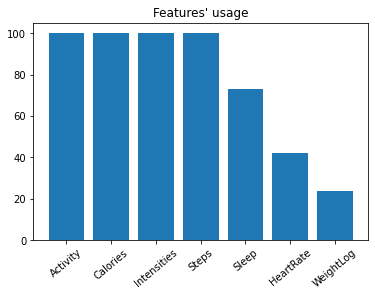

In [19]:
plt.bar(feature_Trend["Feature"], feature_Trend["Percent"])
plt.ylim(ymin=0)
plt.xticks(rotation=40)
plt.title("Features' usage")
plt.show()

Insight: Smart device users interested in active features such as Intensities, Calories, and Steps.

#### Device Daily Frequency

In [20]:
daily_Frequency = dailyActivity_tb.drop(columns=["TrackerDistance","LoggedActivitiesDistance","SedentaryActiveDistance", "VeryActiveDistance","ModeratelyActiveDistance",
"LightActiveDistance", "VeryActiveMinutes","FairlyActiveMinutes", "LightlyActiveMinutes"])

In [21]:
daily_Frequency.insert(2, "WeekDay",value=daily_Frequency["ActivityDate"].dt.day_name())

In [22]:
daily_Frequency.head()

,Id,ActivityDate,WeekDay,TotalSteps,TotalDistance,SedentaryMinutes,Calories
0,1503960366,2016-04-12,Tuesday,13162,8.50,728,1985
1,1503960366,2016-04-13,Wednesday,10735,6.97,776,1797
2,1503960366,2016-04-14,Thursday,10460,6.74,1218,1776
3,1503960366,2016-04-15,Friday,9762,6.28,726,1745
4,1503960366,2016-04-16,Saturday,12669,8.16,773,1863


In [38]:
day_Count = daily_Frequency["WeekDay"].value_counts()

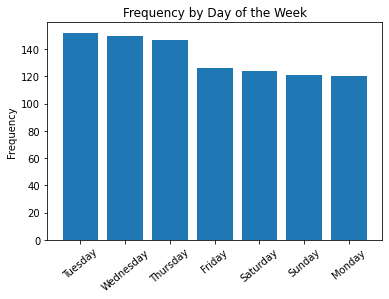

In [39]:
plt.bar(day_Count.index, day_Count.values )
plt.ylim(ymin=0)
plt.xticks(rotation=40)
plt.title("Frequency by Day of the Week")
plt.ylabel("Frequency")
plt.show()

Insight: Users tend to use the smart device to track their activity during mid-days of the week Tuesday to Friday.

In [40]:
weekday_groupby = daily_Frequency.groupby("WeekDay").sum().sort_values(by=["TotalSteps"])

In [41]:
weekday_groupby

,Id,TotalSteps,TotalDistance,SedentaryMinutes,Calories
WeekDay,,,,,
Sunday,586564433332,838921,608.289999,119821,273823
Monday,583191565168,933704,666.349999,123353,278905
Friday,615005670045,938477,669.049998,126039,293805
Saturday,608601309337,1010969,725.980000,119571,292016
Thursday,711079752135,1088658,780.900004,141413,323337
Wednesday,722278666243,1133906,823.249999,148422,345393
Tuesday,737361530913,1235001,886.499995,153119,358114


#### Steps in Day

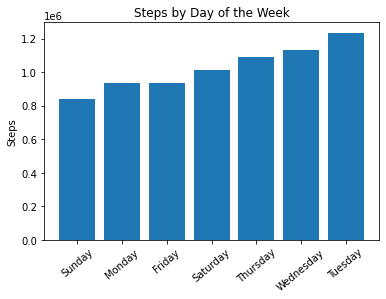

In [42]:
plt.bar(weekday_groupby.index, weekday_groupby.TotalSteps)
plt.ylim(ymin=0)
plt.xticks(rotation=40)
plt.title("Steps by Day of the Week")
plt.ylabel("Steps")
plt.show()

Insight: Users are more active in the middle of the week than the weekends

#### Relationship between Usage and Activity

In [74]:
df_dayCount = day_Count.to_frame()

In [75]:
df_dayCount.rename(columns = {'WeekDay' : 'Frequency'}, inplace = True)

In [76]:
df_dayCount

,Frequency
Tuesday,152
Wednesday,150
Thursday,147
Friday,126
Saturday,124
Sunday,121
Monday,120


In [69]:
weekday_join = weekday_groupby.join(df_dayCount)

In [73]:
weekday_join

,Id,TotalSteps,TotalDistance,SedentaryMinutes,Calories,Frequency
WeekDay,,,,,,
Sunday,586564433332,838921,608.289999,119821,273823,121
Monday,583191565168,933704,666.349999,123353,278905,120
Friday,615005670045,938477,669.049998,126039,293805,126
Saturday,608601309337,1010969,725.980000,119571,292016,124
Thursday,711079752135,1088658,780.900004,141413,323337,147
Wednesday,722278666243,1133906,823.249999,148422,345393,150
Tuesday,737361530913,1235001,886.499995,153119,358114,152


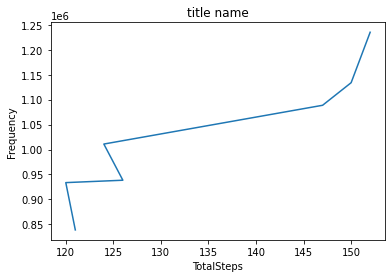

In [72]:
plt.plot(weekday_join.Frequency,weekday_join.TotalSteps)
plt.title('title name')
plt.xlabel('TotalSteps')
plt.ylabel('Frequency')
plt.show()

Insight: There is a positive correlation between smart device usage frequency and the activity of the users.

#### Relationship between activity level and calories burnt.

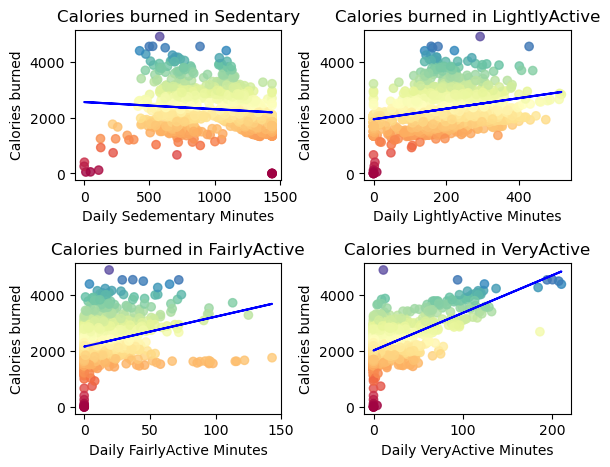

In [54]:
plt.figure()
plt.subplot(2, 2, 1)
sed_Min = dailyActivity_tb.SedentaryMinutes
cal_Used = dailyActivity_tb.Calories
plt.scatter(sed_Min, cal_Used,  alpha = 0.8, c = cal_Used, cmap = "Spectral")
z = np.polyfit(sed_Min, cal_Used, 1)
p = np.poly1d(z)
plt.plot(sed_Min,p(sed_Min),"b")
plt.xlabel("Daily Sedementary Minutes")
plt.ylabel("Calories burned")
plt.title("Calories burned in Sedentary")

plt.subplot(2, 2, 2)
light_Min = dailyActivity_tb.LightlyActiveMinutes
cal_Used = dailyActivity_tb.Calories
plt.scatter(light_Min, cal_Used,  alpha = 0.8, c = cal_Used, cmap = "Spectral")
z = np.polyfit(light_Min, cal_Used, 1)
p = np.poly1d(z)
plt.plot(light_Min,p(light_Min),"b")
plt.xlabel("Daily LightlyActive Minutes")
plt.ylabel("Calories burned")
plt.title("Calories burned in LightlyActive")

plt.subplot(2, 2, 3)
fair_Min = dailyActivity_tb.FairlyActiveMinutes
cal_Used = dailyActivity_tb.Calories
plt.scatter(fair_Min, cal_Used,  alpha = 0.8, c = cal_Used, cmap = "Spectral")
z = np.polyfit(fair_Min, cal_Used, 1)
p = np.poly1d(z)
plt.plot(fair_Min,p(fair_Min),"b")
plt.xlabel("Daily FairlyActive Minutes")
plt.ylabel("Calories burned")
plt.title("Calories burned in FairlyActive")

plt.subplot(2, 2, 4)
veryactive_Min = dailyActivity_tb.VeryActiveMinutes
cal_Used = dailyActivity_tb.Calories
plt.scatter(veryactive_Min, cal_Used,  alpha = 0.8, c = cal_Used, cmap = "Spectral")
z = np.polyfit(veryactive_Min, cal_Used, 1)
p = np.poly1d(z)
plt.plot(veryactive_Min,p(veryactive_Min),"b")
plt.xlabel("Daily VeryActive Minutes")
plt.ylabel("Calories burned")
plt.title("Calories burned in VeryActive")
plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.4, hspace=0.55)
plt.show()

Insight: Higher intensive-activity uses more calories

#### Percentage of Activity in Minutes

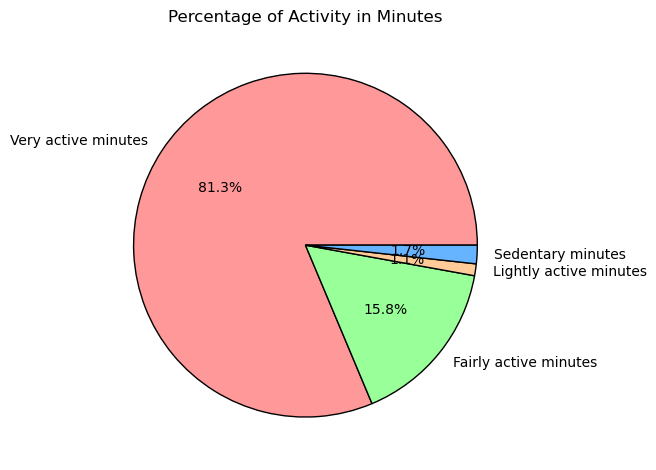

In [80]:
# calculating total of individual minutes column
veryActive_mins = dailyActivity_tb["VeryActiveMinutes"].sum()
fairlyActive_mins = dailyActivity_tb["FairlyActiveMinutes"].sum()
lightlyActive_mins = dailyActivity_tb["LightlyActiveMinutes"].sum()
sedentary_mins = dailyActivity_tb["SedentaryMinutes"].sum()

# plotting pie chart
slices = [sedentary_mins, lightlyActive_mins, fairlyActive_mins, veryActive_mins]
labels = ["Very active minutes", "Fairly active minutes", "Lightly active minutes", "Sedentary minutes"]
colours = ['#ff9999','#99ff99','#ffcc99','#66b3ff']
plt.style.use("default")
plt.pie(slices, labels = labels, 
        colors = colours, wedgeprops = {"edgecolor": "black"}, 
        autopct = "%1.1f%%")
plt.title("Percentage of Activity in Minutes")
plt.tight_layout()
plt.show()

Insight: Smart device users tend to spend much time seated in a day. 

## Step 4: Act

#### Recommendations to business

    1. Trends identified
    
    - Smart device users interested in active features such as Intensities, Calories, and Steps.
    - Users tend to use the smart device to track their activity during mid-days of the week Tuesday to Friday.
    - Users are more active in the middle of the week than the weekends
    - There is a positive correlation between smart device usage frequency and the activity of the users.
    - Majority of users have a sedentary lifestyle.


    2. Marketing Strategy for Bellabeat
    
    - Bellabeat should focus more on the active features of its application. It can encourage users to have a healthy lifestyle by notifying users to have fairly intense activity on a weekday and high intense exercise on weekends. Also, let them track their calories burnt rate information along with their exercise time in a day.
    - Bellabeat can also provide an alert function to users who have a high sedentary minutes.
